In [1]:
import xarray as xr
from floater import rclv
from matplotlib import pyplot as plt
import numpy as np
import holoviews as hv
import pandas as pd
%matplotlib inline

In [2]:
from skimage.feature import peak_local_max

In [3]:
import datashader
from holoviews.operation.datashader import shade, regrid

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
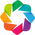

In [4]:
hv.extension('bokeh')

In [5]:
ds = xr.open_dataset('lavd_agulhas.nc')
ds

<xarray.Dataset>
Dimensions:   (duration: 3, sampling: 3, x0: 450, y0: 500)
Coordinates:
  * y0        (y0) float32 -40.99 -40.97 -40.95 -40.93 -40.91 -40.89 -40.87 ...
  * x0        (x0) float32 1.01 1.03 1.05 1.07 1.09 1.11 1.13 1.15 1.17 1.19 ...
  * sampling  (sampling) object 'h' 'd' 'w'
  * duration  (duration) int64 15 30 60
Data variables:
    lavd      (duration, sampling, y0, x0) float32 ...

In [6]:
hds = hv.Dataset(ds)
im = hds.to(hv.Image, kdims=['x0', 'y0'])
dmap = shade(regrid(im), cmap=plt.cm.gray)

In [7]:
def plm_scatter(sampling='w', duration=30, min_distance=50):
    raw = ds.lavd.sel(sampling=sampling, duration=duration).data
    plm = peak_local_max(raw, min_distance=min_distance)
    def points_to_pandas(pts):
        j, i = pts.transpose()
        df = pd.DataFrame({'x0': ds.x0[i], 'y0': ds.y0[j],
                           'lavd': raw[j, i], 'j': j, 'i': i})
        return df
    plm_df = points_to_pandas(plm)
    hpts = hv.Scatter(plm_df, kdims=['x0', 'y0'], vdims=['lavd', 'j', 'i'])
    return hpts

In [8]:
min_distance_dim = hv.Dimension(('min_distance', 'min_distance'), default=30)
plm_dmap = hv.DynamicMap(plm_scatter, kdims=['sampling', 'duration', min_distance_dim])
plm_dmap = plm_dmap.redim.values(sampling=ds.sampling.values,
                                 duration=ds.duration.values)
plm_dmap = plm_dmap.redim.range(min_distance=(10,100))
plm_dmap = plm_dmap.options(tools=['hover', 'tap'])

In [9]:
from bokeh.models import HoverTool
# this doesn't work, %lavd doesn't get populated
hover = HoverTool(tooltips=[("lavd", "$lavd")])

In [10]:
def contour(ji, data, levels=np.arange(0.05,0.7,0.1)):
    #frac_levels, cd = cd_vs_contour(raw, ji)

    ji = tuple(ji)
    all_curves = {}
    for frac in levels:
        lev = frac * data[ji]
        try:
            con, region_data, border_j, border_i = rclv.find_contour_around_maximum(data, ji, lev)
            con[:, 0] += (ji[0]-border_j[0])
            con[:, 1] += (ji[1]-border_i[0])
            con_geo = rclv.contour_ji_to_geo(con, ds.x0.data, ds.y0.data)
            all_curves[(1-frac)] = hv.Curve(con_geo, label='%3.2f' % (1-frac)).options(color='magenta')
        except ValueError:
            break
    return hv.NdOverlay(all_curves)

In [11]:
#selection_color, selection_alpha, etc. and equivalently nonselection_color, nonselection_alpha

In [12]:
def plot_point_from_click(sampling, duration, min_distance, index=None, x=None, y=None):
    if x and y:
        pts = [(x, y)]
    else:
        pts = []
    return hv.Points(pts)

In [13]:
def plot_contour_from_selection(sampling, duration, min_distance, index=[1]):
    if not index:
        #return hv.Text(4, -36, 'NO INDEX')
        print('No index: returning empty NdOverlay')
        return hv.NdOverlay({1: hv.Curve([])}).options(legend_limit=0)
    idx = index[0]
    point_data = plm_dmap.data[sampling, duration, min_distance].data.loc[idx]
    if len(point_data) >= idx:
        print('Index too big for data: returning empty NdOverlay')
        return hv.NdOverlay({1: hv.Curve([])}).options(legend_limit=0)        
    ji = point_data.j, point_data.i
    ji = tuple([int(val) for val in ji])
    lavd_data = ds.lavd.sel(sampling=sampling, duration=duration).data
    con = contour(ji, lavd_data).options(legend_limit=0)
    print('Returning a contour')
    return con
    #return hv.Text(4, -36, 'ji: %s' % repr(ji))

In [14]:
click_stream = hv.streams.Selection1D(source=plm_dmap)

contour_dmap = hv.DynamicMap(plot_contour_from_selection, #plot_point_from_click,
                             kdims=['sampling', 'duration', min_distance_dim],
                             streams=[click_stream])
contour_dmap = contour_dmap.redim.values(sampling=ds.sampling.values,
                                 duration=ds.duration.values)
contour_dmap = contour_dmap.redim.range(min_distance=(10,100))

In [15]:
def cd_vs_contour_data(data, ji, frac_levels=np.arange(0.01, 0.71, 0.01)):
    area_vs_contour = np.full((len(frac_levels), 3), np.nan)
    for n, frac in enumerate(frac_levels):
        level = frac * data[ji]
        try:
            con, region_data, _, _ = rclv.find_contour_around_maximum(data, ji, level)
            area_vs_contour[n] = rclv.contour_area(con)
        except ValueError:
            break
    region_area, hull_area, cd = np.array(area_vs_contour).transpose()
    data_to_plot = np.vstack([1 - frac_levels, cd]).transpose()
    return data_to_plot
    

In [16]:
def plot_cd_from_selection(sampling, duration, min_distance, index=None):
    print('Entering function')
    data_to_plot = [(np.nan, np.nan)]
    if index:
        idx = index[0]
        print('idx: %g' % idx)
        point_data = plm_dmap.data[sampling, duration, min_distance].data
        if len(point_data) > idx:
            point = point_data.loc[idx]
            ji = point.j, point.i
            ji = tuple([int(val) for val in ji])
            lavd_data = ds.lavd.sel(sampling=sampling, duration=duration).data
            data_to_plot = cd_vs_contour_data(lavd_data, ji)
            print('Got actual data to contour')
    curve = hv.Curve(data_to_plot, 'contour fraction of maximum', 'convexity deficiency')
    curve = curve.redim.range(**{'contour fraction of maximum': (1,0.3),
                                 'convexity deficiency': (1e-6,10)}).options(logy=True)
    print('created curve')
    return curve

In [17]:
plm_dmap.data.keys()

odict_keys([])

In [18]:
curve_dmap = hv.DynamicMap(plot_cd_from_selection,
                             kdims=['sampling', 'duration', min_distance_dim],
                             streams=[click_stream])
curve_dmap = curve_dmap.redim.values(sampling=ds.sampling.values,
                                 duration=ds.duration.values)
curve_dmap = curve_dmap.redim.range(min_distance=(10,100))

In [19]:
plot_cd_from_selection('w', 15, 30, [10])

Entering function
idx: 10


KeyError: ('w', 15, 30)

In [20]:
%opts RGB [height=400 width=400]
%opts Scatter  (color='c', selection_color='magenta', size=8, nonselection_color='c', nonselection_alpha=1)
dmap * plm_dmap * contour_dmap + curve_dmap
#plm_dmap + curve_dmap

No index: returning empty NdOverlay
Entering function
created curve
No index: returning empty NdOverlay
Entering function
created curve


:Layout
   .DynamicMap.I  :DynamicMap   [sampling,duration,min_distance]
      :Overlay
         .RGB.I       :RGB   [x0,y0]   (R,G,B,A)
         .Scatter.I   :Scatter   [x0,y0]   (lavd,j,i)
         .NdOverlay.I :NdOverlay   [Element]
            :Curve   [x]   (y)
   .DynamicMap.II :DynamicMap   [sampling,duration,min_distance]
      :Curve   [contour fraction of maximum]   (convexity deficiency)